<a href="https://colab.research.google.com/github/PranavKarwa2004/Brain-Tumor-Detection-Using-CNN/blob/main/Brain_Tumor_Dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035 (from 1)
Receiving objects: 100% (3039/3039), 79.25 MiB | 14.97 MiB/s, done.
Updating files: 100% (3264/3264), done.


In [ ]:
!pwd

/content


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np
import random
import os
from tqdm import tqdm
import pickle
import cv2

In [ ]:
# Define necessary constants
TEST_DIR = '/content/Brain-Tumor-Classification-DataSet/Testing'
TRAIN_DIR = '/content/Brain-Tumor-Classification-DataSet/Training'
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])

    random.shuffle(training_data)

create_training_data()
#np.save('train_data.npy', training_data)
print(len(training_data))

print("train")
print()
X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

100%|██████████| 827/827 [00:03<00:00, 256.94it/s]


2870
train



In [ ]:
# Creating testing dataset
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          testing_data.append([new_array, class_num])

    random.shuffle(testing_data)

create_testing_data()
#np.save('testing_data.npy', testing_data)
print(len(testing_data))

print("testing")
print()
X_test= np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

100%|██████████| 74/74 [00:00<00:00, 111.82it/s]


394
testing



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np


Model 1:VGG16


In [ ]:
tensorboard = TensorBoard(log_dir='./VGG16logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [ ]:
# We'll use VGG16 to quickly define a model
vgg16_model = vgg16.VGG16()
vgg16_model.summary()
type(vgg16_model)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

keras.src.models.functional.Functional

In [ ]:

# Dropping last layers
model = Sequential()
for layer in vgg16_model.layers[:-3]:
    model.add(layer)


for layer in model.layers:
    layer.trainable = True

# Adding last Dense Layer
model.add(Dense(4,activation = 'softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 14,815,044 (56.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [ ]:

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=50,validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 122s 956ms/step - accuracy: 0.3158 - loss: 1.5280 - val_accuracy: 0.3122 - val_loss: 1.9751
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 473ms/step - accuracy: 0.5871 - loss: 0.9494 - val_accuracy: 0.3401 - val_loss: 1.7472
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 470ms/step - accuracy: 0.6641 - loss: 0.7863 - val_accuracy: 0.4036 - val_loss: 1.9388
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 462ms/step - accuracy: 0.7019 - loss: 0.6821 - val_accuracy: 0.3528 - val_loss: 1.6294
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 462ms/step - accuracy: 0.7129 - loss: 0.6846 - val_accuracy: 0.4518 - val_loss: 1.8484
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 468ms/step - accuracy: 0.7485 - loss: 0.6038 - val_accuracy: 0.4746 - val_loss: 2.4992
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 471ms/step - accuracy: 0.7919 - loss: 0.5045 - val_accuracy: 0.5533 - val_loss: 1.9579
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 464ms/step - accuracy: 0.8366 - loss: 0.4123 - val_acc

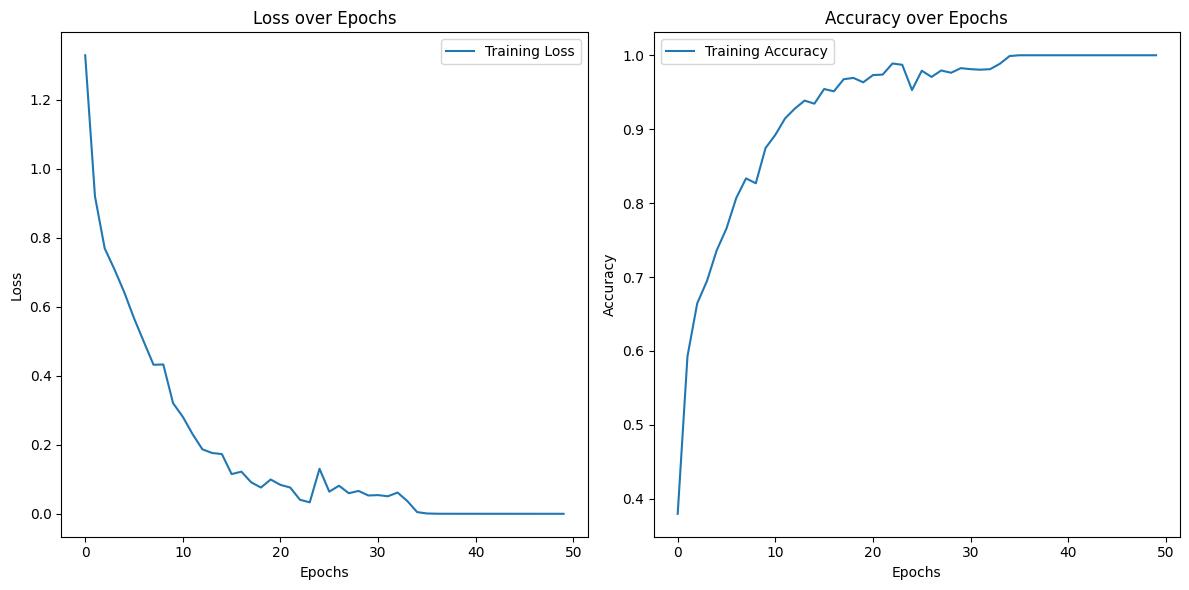

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.7617 - loss: 10.8938
Test loss: 10.858610153198242
Test accuracy: 0.7639594078063965


In [ ]:
model.save("model.h5") # replace model.h5 in "Runner"

In [ ]:

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 354ms/step
              precision    recall  f1-score   support

           0       0.86      0.19      0.31       100
           1       0.75      0.99      0.86       115
           2       0.70      1.00      0.82       105
           3       0.90      0.85      0.88        74

    accuracy                           0.76       394
   macro avg       0.80      0.76      0.72       394
weighted avg       0.79      0.76      0.71       394



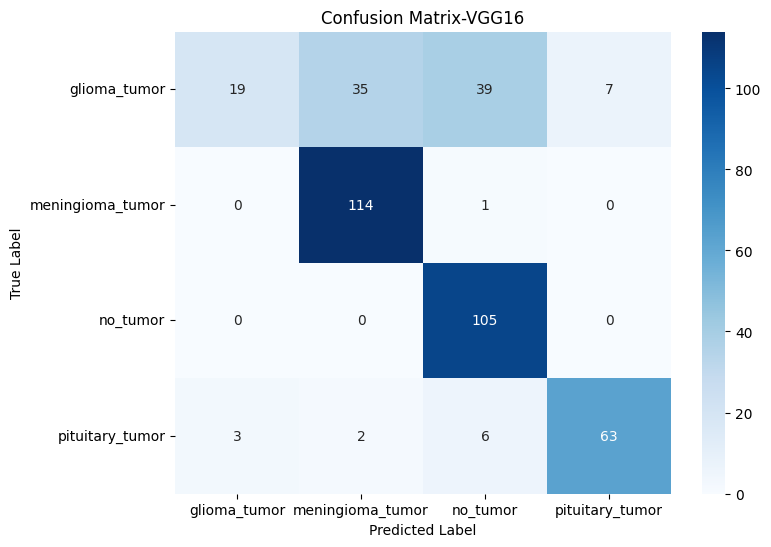

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred_bool)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-VGG16')

# Show the plot
plt.show()


Model 2: InceptionV3

In [ ]:
from keras.applications import InceptionV3

In [ ]:
# Load the InceptionV3 model without the top layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Build the model
model_inception = Sequential()
model_inception.add(inception_model)
model_inception.add(Flatten())
model_inception.add(Dense(256, activation='relu'))
model_inception.add(Dense(4, activation='softmax'))

In [ ]:
# Freeze base InceptionV3 layers
for layer in inception_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model_inception.compile(loss='sparse_categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

In [ ]:
# Train the model
history_inception = model_inception.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 49s 329ms/step - accuracy: 0.5665 - loss: 18.7830 - val_accuracy: 0.6066 - val_loss: 1.7350
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8729 - loss: 0.3678 - val_accuracy: 0.7132 - val_loss: 1.3397
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9634 - loss: 0.1158 - val_accuracy: 0.7817 - val_loss: 1.2145
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9853 - loss: 0.0537 - val_accuracy: 0.7893 - val_loss: 1.3527
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9981 - loss: 0.0245 - val_accuracy: 0.8020 - val_loss: 1.2625
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9976 - loss: 0.0267 - val_accuracy: 0.7893 - val_loss: 1.3598
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.7944 - val_loss: 1.4791
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.7

In [ ]:
model_inception.save('model_InceptionV3.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


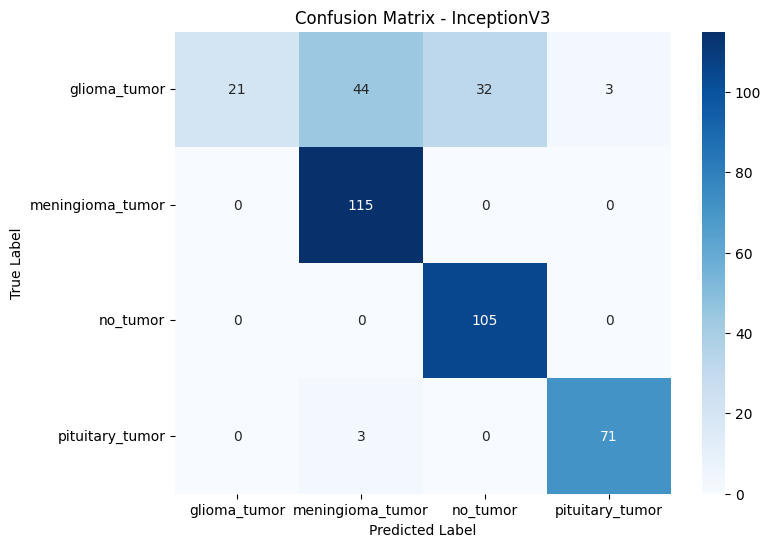

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Get predictions for the test set
y_pred_inception = model_inception.predict(X_test, batch_size=64, verbose=1)
y_pred_inception_bool = np.argmax(y_pred_inception, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm_inception = confusion_matrix(Y_test, y_pred_inception_bool)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_inception, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - InceptionV3')

# Show the plot
plt.show()


Model 3: EfficientNetB0

In [ ]:
from keras.applications import EfficientNetB0

# Load the EfficientNetB0 model without the top layers
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Build the model
model_efficientnet = Sequential()
model_efficientnet.add(efficientnet_model)
model_efficientnet.add(Flatten())
model_efficientnet.add(Dense(256, activation='relu'))
model_efficientnet.add(Dense(4, activation='softmax'))

In [ ]:
# Freeze base EfficientNetB0 layers
for layer in efficientnet_model.layers:
    layer.trainable = False

# Compile the model
model_efficientnet.compile(loss='sparse_categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

In [ ]:
# Train the model
history_efficientnet = model_efficientnet.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 61s 362ms/step - accuracy: 0.2725 - loss: 12.6695 - val_accuracy: 0.2919 - val_loss: 1.4116
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.2838 - loss: 1.6801 - val_accuracy: 0.2538 - val_loss: 1.5136
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2975 - loss: 1.7298 - val_accuracy: 0.1878 - val_loss: 1.8526
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2959 - loss: 1.5503 - val_accuracy: 0.2893 - val_loss: 1.3845
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2897 - loss: 1.5391 - val_accuracy: 0.3350 - val_loss: 1.4401
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.3150 - loss: 1.5724 - val_accuracy: 0.1878 - val_loss: 1.4434
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.3052 - loss: 1.4242 - val_accuracy: 0.2487 - val_loss: 1.5707
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2909 - loss: 1.4363 - val_accuracy: 0.2538 

In [ ]:
model_efficientnet.save('model_EfficientNetB0.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


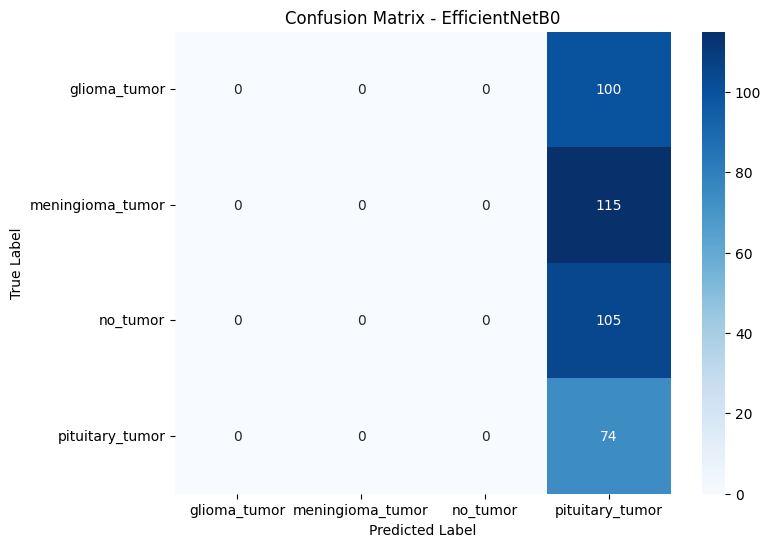

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Get predictions for the test set
y_pred_efficientnet = model_efficientnet.predict(X_test, batch_size=64, verbose=1)
y_pred_efficientnet_bool = np.argmax(y_pred_efficientnet, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm_efficientnet = confusion_matrix(Y_test, y_pred_efficientnet_bool)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_efficientnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - EfficientNetB0')

# Show the plot
plt.show()


Comparisons

Plotting Training and Validation Accuracy/Loss

In [ ]:
def plot_metrics(history, model_name):
    # Get training and validation metrics (if available)
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


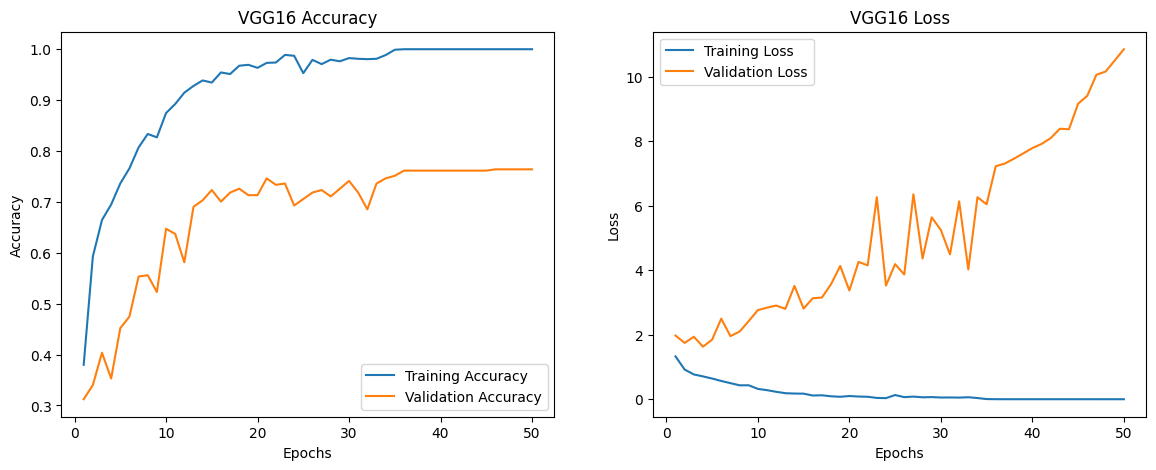

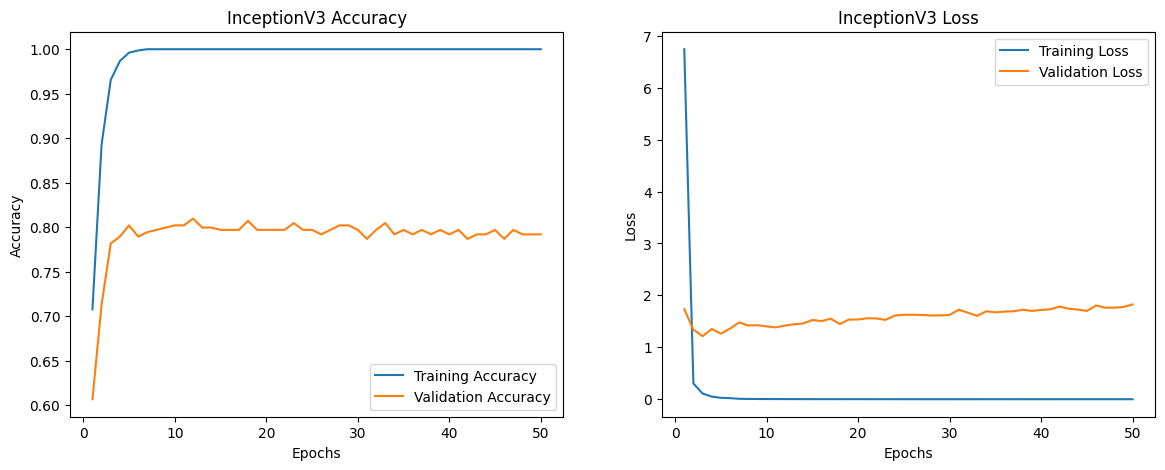

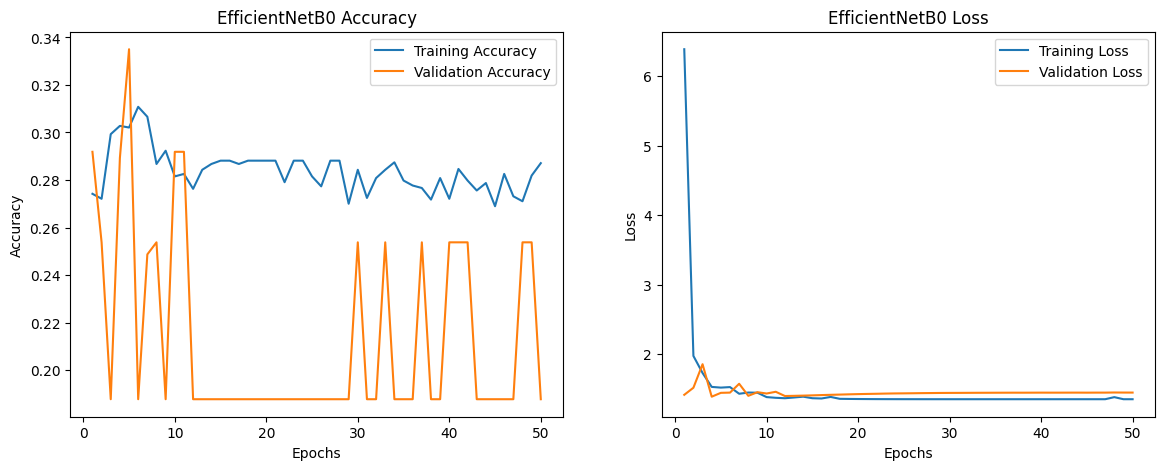

In [ ]:
# Plotting metrics for VGG16
plot_metrics(history, "VGG16")

# Plotting metrics for InceptionV3
plot_metrics(history_inception, "InceptionV3")

# Plotting metrics for EfficientNetB0
plot_metrics(history_efficientnet, "EfficientNetB0")

Overlayed Accuracy and Loss Comparison

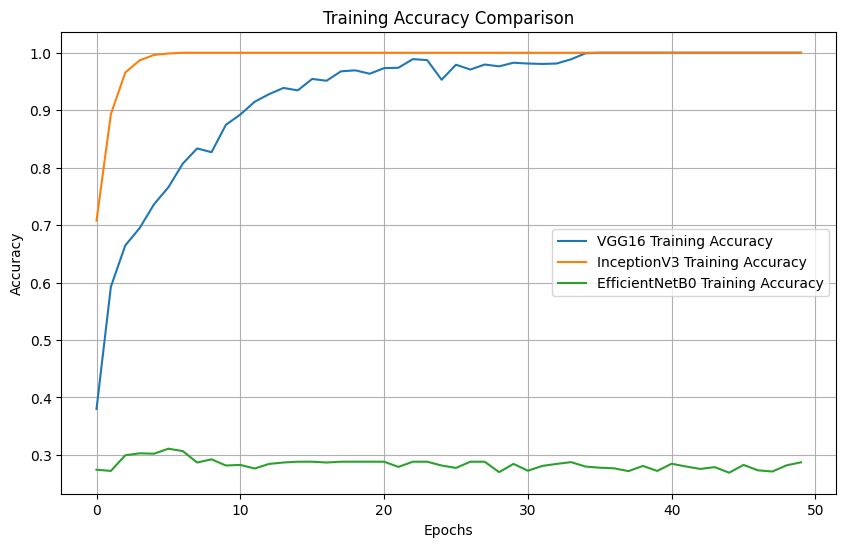

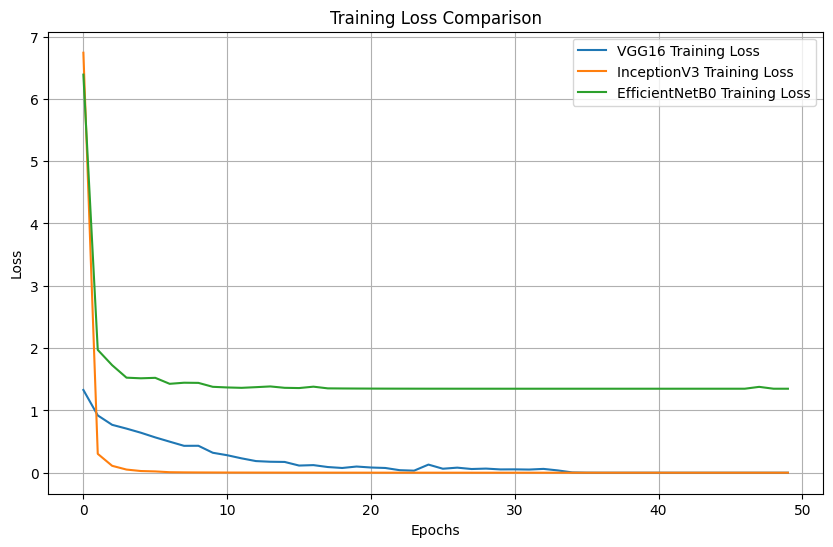

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))

# VGG16 Training Accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='VGG16 Training Accuracy')

# InceptionV3 Training Accuracy
if 'accuracy' in history_inception.history:
    plt.plot(history_inception.history['accuracy'], label='InceptionV3 Training Accuracy')

# EfficientNetB0 Training Accuracy
if 'accuracy' in history_efficientnet.history:
    plt.plot(history_efficientnet.history['accuracy'], label='EfficientNetB0 Training Accuracy')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 6))

# VGG16 Training Loss
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='VGG16 Training Loss')

# InceptionV3 Training Loss
if 'loss' in history_inception.history:
    plt.plot(history_inception.history['loss'], label='InceptionV3 Training Loss')

# EfficientNetB0 Training Loss
if 'loss' in history_efficientnet.history:
    plt.plot(history_efficientnet.history['loss'], label='EfficientNetB0 Training Loss')

plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# VGG16 Test Accuracy
vgg16_test_loss, vgg16_test_accuracy = model.evaluate(X_test, Y_test)
print(f'VGG16 Test Accuracy: {vgg16_test_accuracy * 100:.2f}%')

# InceptionV3 Test Accuracy
inception_test_loss, inception_test_accuracy = model_inception.evaluate(X_test, Y_test)
print(f'InceptionV3 Test Accuracy: {inception_test_accuracy * 100:.2f}%')

# EfficientNetB0 Test Accuracy
efficientnet_test_loss, efficientnet_test_accuracy = model_efficientnet.evaluate(X_test, Y_test)
print(f'EfficientNetB0 Test Accuracy: {efficientnet_test_accuracy * 100:.2f}%')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.7617 - loss: 10.8938
VGG16 Test Accuracy: 76.40%
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7877 - loss: 2.0795
InceptionV3 Test Accuracy: 79.19%
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1965 - loss: 1.4383
EfficientNetB0 Test Accuracy: 18.78%


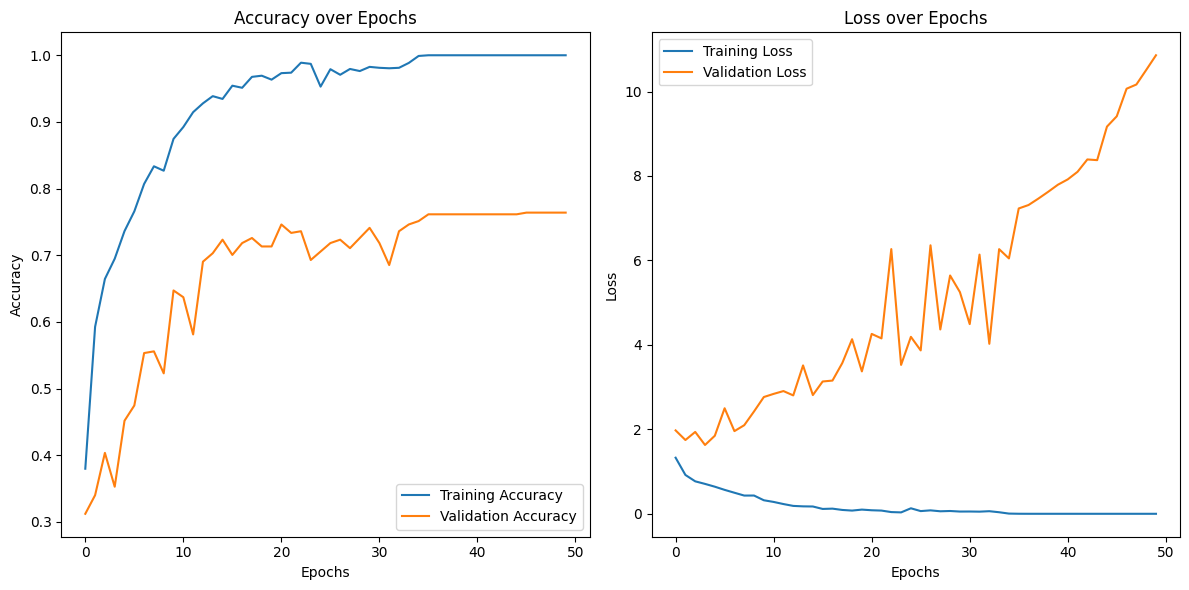

In [ ]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


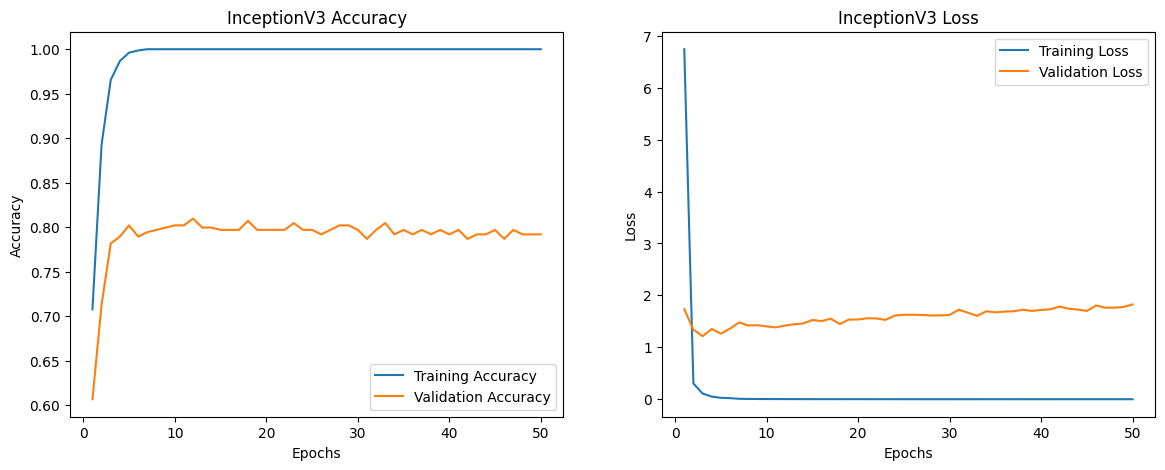

In [ ]:
plot_metrics(history_inception, "InceptionV3")

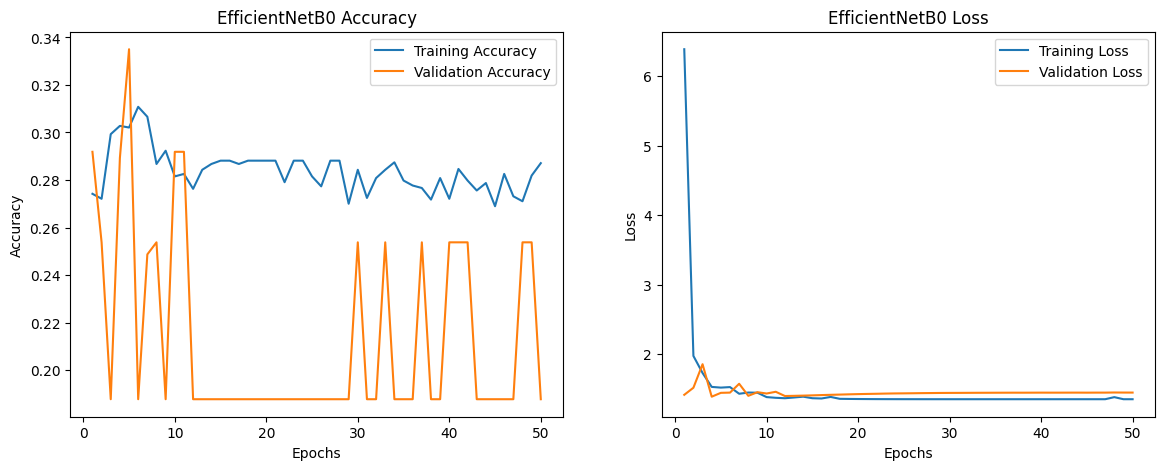

In [ ]:
plot_metrics(history_efficientnet, "EfficientNetB0")

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

# Define class names
class_names = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)

    # Specificity = TN / (TN + FP)
    # True Negative is cm[0,0], False Positive is cm[0,1]
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])

    return precision, recall, specificity, accuracy

# Evaluate models
def evaluate_model(model, X_test, Y_test):
    y_pred = model.predict(X_test, batch_size=64, verbose=1)
    y_pred_bool = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    precision, recall, specificity, accuracy = compute_metrics(Y_test, y_pred_bool)

    return precision, recall, specificity, accuracy

# VGG16 Metrics
precision_vgg16, recall_vgg16, specificity_vgg16, accuracy_vgg16 = evaluate_model(model, X_test, Y_test)

# InceptionV3 Metrics
precision_inception, recall_inception, specificity_inception, accuracy_inception = evaluate_model(model_inception, X_test, Y_test)

# EfficientNetB0 Metrics
precision_efficientnet, recall_efficientnet, specificity_efficientnet, accuracy_efficientnet = evaluate_model(model_efficientnet, X_test, Y_test)

# Print results
print("VGG16 Metrics: Precision: {:.4f}, Sensitivity (Recall): {:.4f}, Specificity: {:.4f}, Accuracy: {:.4f}".format(precision_vgg16, recall_vgg16, specificity_vgg16, accuracy_vgg16))
print("InceptionV3 Metrics: Precision: {:.4f}, Sensitivity (Recall): {:.4f}, Specificity: {:.4f}, Accuracy: {:.4f}".format(precision_inception, recall_inception, specificity_inception, accuracy_inception))
print("EfficientNetB0 Metrics: Precision: {:.4f}, Sensitivity (Recall): {:.4f}, Specificity: {:.4f}, Accuracy: {:.4f}".format(precision_efficientnet, recall_efficientnet, specificity_efficientnet, accuracy_efficientnet))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
VGG16 Metrics: Precision: 0.7939, Sensitivity (Recall): 0.7640, Specificity: 0.3519, Accuracy: 0.7640
InceptionV3 Metrics: Precision: 0.8455, Sensitivity (Recall): 0.7919, Specificity: 0.3231, Accuracy: 0.7919
EfficientNetB0 Metrics: Precision: 0.0353, Sensitivity (Recall): 0.1878, Specificity: nan, Accuracy: 0.1878


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-45-f0229a4eb975>:16: RuntimeWarning: invalid value encountered in scalar divide
  specificity = cm[0,0] / (cm[0,0] + cm[0,1])
